# Initiate

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import selenium
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException 
from selenium import webdriver

import datetime


In [74]:
#Inisiasi 
s=Service('C:/SAINS DATA/chromedriver.exe')
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
options.add_argument('disable_infobars')
# options.headless = True

driver = webdriver.Chrome(service=s, options=options)
url="https://www.youtube.com/c/VancityReynolds/videos"
# url2 = "https://www.youtube.com/watch?v=QPQUrUS47Hg"
# url3 = 'https://www.youtube.com/watch?v=wh2bTMptuCA&t=2s'
# ftmm = 'https://www.youtube.com/channel/UCsAMAkGdR0kedB4iYlhQ4EA/videos'
# endang = 'https://www.youtube.com/channel/UCEvzoWUVWzp36qyagATw2sA/videos'

driver.get(url)
driver.maximize_window()


# Detail Scrapping

## Locate Element


In [143]:
#number of comments 
c = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
print(c.text.split(' ')[0])

1,207


In [94]:
#detail views
views_child = driver.find_element(By.CSS_SELECTOR, 'ytd-video-view-count-renderer[class = "style-scope ytd-video-primary-info-renderer"]')
print(views_child.text)

607,629 views


In [119]:
#get duration 
dur = driver.find_element(By.CLASS_NAME, 'ytp-time-duration')
print(dur.text)

3:18


In [ ]:
#check for short
short = driver.find_element(By.CSS_SELECTOR, 'span[aria-label="Shorts"]')
print(short.get_attribute('aria-label'))

Shorts


In [154]:
#if comment was turn off
no_comm = driver.find_element(By.CSS_SELECTOR, 'yt-formatted-string[id = "message"]')
no_comm2 = no_comm.text.replace('Learn more', '')
print(no_comm2)

Comments are turned off. 


In [284]:
#gate date
detail = driver.find_element(By.ID, 'info-strings') #parent
date2 = detail.find_element(By.CSS_SELECTOR, 'yt-formatted-string[class = "style-scope ytd-video-primary-info-renderer"]')
print(date2.text)
if date2.text == '': 
    date_details.append('-')
    driver.back()
    time.sleep(1)
else :     
    # print(date2.text) 
    date_details.append(date2.text)
    driver.back()
    time.sleep(1)



Mar 24, 2022


In [226]:
#get text in a video
channel_vid = driver.find_element(By.ID, 'video-title')
channel_vid.click()
time.sleep(3)
driver.execute_script("window.scrollTo(0, 500);")
time.sleep(3)
# l = driver.find_element(By.CSS_SELECTOR, 'div[id = "top-level-buttons-computed"]')
# li = l.find_element(By.CSS_SELECTOR, 'ytd-toggle-button-renderer[class= "style-scope ytd-menu-renderer force-icon-button style-text"]')

print(teks.text)
c = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
print(c.text.split(' ')[0])


Creative Ladder
606,864 viewsJun 21, 2022
38K
DISLIKE
SHARE
SAVE
1,220


In [227]:
#get clean likes
teks = driver.find_element(By.CLASS_NAME, 'style-scope ytd-video-primary-info-renderer')
t = teks.text.replace('\n', ' ').split(' ')
suka = []
for i in t:
    if i.endswith('K'): 
        suka_int = int(i.replace('K', '').replace('.', ''))*100
        suka.append(suka_int)
        
print(suka)

[3800]


In [17]:
#get likes 
likes_parent = driver.find_element(By.ID, 'menu-container')
# likes = likes_parent.find_elements(By.CSS_SELECTOR, '*')
# print(likes[3].get_attribute('class'))

likes = likes_parent.find_element(By.CSS_SELECTOR, 'ytd-toggle-button-renderer[class = "style-scope ytd-menu-renderer force-icon-button style-text"]')
print(likes.text)

3


## Scroll

In [11]:
SCROLL_PAUSE_TIME = 0.8

# Get scroll height
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.CONTROL + Keys.HOME)
channel_vid = driver.find_elements(By.CSS_SELECTOR, 'a[id = "video-title"]')

## Start Little Scrap

In [15]:
title = driver.find_elements(By.ID, 'video-title')
views = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
date = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[2]')
duration = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-thumbnail-overlay-time-status-renderer')

## Get Links

In [12]:
# get links
links = []
link = driver.find_elements(By.ID, 'thumbnail')
for i in link: 
    href = i.get_attribute('href')
    if href != None: 
        links.append(href)
        
print(len(links))

28


In [13]:
# filter shorts
no_shorts_vid = []
short_index = []
for i in links:
    if 'shorts' not in i:
        no_shorts_vid.append(i)
    else : 
        short_index.append(links.index(i))
        
print(len(no_shorts_vid))

28


### Get Links in Specific Number

In [75]:
SCROLL_PAUSE_TIME = 0.7

# Get scroll height
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    # search for links
    links = []
    link = driver.find_elements(By.ID, 'thumbnail')
    link2=[]
    for i in link:
        if i not in link2:
            link2.append(i.get_attribute('href'))
    print(len(link2))
    
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if len(link) >= 300:
        break
    last_height = new_height

31
61
91
121
151
181
211
241
271
301


In [81]:
# remove None
for i in link2:
    if i == None:
        link2.remove(i)
print(len(link2))


300


## Start Scrapping

In [14]:
date_details = []
views_details = []
video_likes = []
video_comments = []
video_duration = []
n = 1

for ling in no_shorts_vid : 
    driver.get(ling)
    time.sleep(3.5)
    
    
    #GET LIKES
    likes_parent = driver.find_element(By.ID, 'menu-container')
    likes = likes_parent.find_element(By.CSS_SELECTOR, 'ytd-toggle-button-renderer[class = "style-scope ytd-menu-renderer force-icon-button style-text"]')
    video_likes.append(likes.text)
    # teks = driver.find_element(By.CLASS_NAME, 'style-scope ytd-video-primary-info-renderer')
    # t = teks.text.replace('\n', ' ').split(' ')
    # for i in t:
    #     if i.endswith('K'): 
    #         suka_int = int(i.replace('K', '').replace('.', ''))*100
    #         video_likes.append(suka_int)
    
    driver.execute_script("window.scrollTo(0, 640);")
    time.sleep(3)
    #GET COMMENTS
    try : 
        com = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
        comments = com.text.replace(',', '').split(' ')[0]
        video_comments.append(int(comments))
    except :
        no_comm = driver.find_element(By.CSS_SELECTOR, 'yt-formatted-string[id = "message"]')
        no_comm2 = no_comm.text.replace('Learn more', '')
        video_comments.append(no_comm2)
    
    #GET VIEWS
    num_of_views = driver.find_element(By.CSS_SELECTOR, 'ytd-video-view-count-renderer[class = "style-scope ytd-video-primary-info-renderer"]')
    # print(num_of_views.text)
    true_views = num_of_views.text.split(' ')[0]
    views_details.append(true_views)
    
    #GET DURATION
    # dur = driver.find_element(By.CLASS_NAME, 'ytp-time-duration')
    # duration_time = dur.text
    # video_duration.append(duration_time)
    
    # GET DATE
    detail = driver.find_element(By.ID, 'info-strings') #parent
    date2 = detail.find_element(By.CSS_SELECTOR, 'yt-formatted-string[class = "style-scope ytd-video-primary-info-renderer"]')
    if date2.text == '': 
        date_details.append('-')

    else :     
        print(date2.text) 
        date_details.append(date2.text)

    print(f'{n}. {driver.title} -> views = {true_views}, likes = {likes.text}, comments = {comments}')
    n = n + 1

Jun 26, 2022
1. PDD UKTPT Bidang Pengajaran - SERDOS SMART 2022 - Endang Sholihatin - YouTube -> views = 95, likes = 3, comments = 1
Jun 22, 2022
2. Dr Endang Sholihatin S. Pd. ,M. Pd. Mengajar Kalimat Efektif - YouTube -> views = 160, likes = 3, comments = 1
Jun 1, 2022
3. reels 3 pengmas SMPN 1 Balongbendo Sidoarjo 30 Mei 2022 - YouTube -> views = 24, likes = 0, comments = 0
Jun 1, 2022
4. reels 2 pengmas SMPN 1 Balongbendo Sidoarjo 30 Mei 2022 - YouTube -> views = 47, likes = 2, comments = 0
Jun 1, 2022
5. reels pengmas SMPN 1 Balongbendo Sidoarjo 30 Mei 2022 - YouTube -> views = 17, likes = 1, comments = 0
Jun 1, 2022
6. PENGMAS PENINGKATAN KOMPETENSI GURU INOVASI MEDIA PEMBELAJARAN DI SMPN 1 BALONGBENDO SIDOARJO - YouTube -> views = 35, likes = 4, comments = 0
Oct 12, 2021
7. PEMAKAIAN HURUF KAPITAL, MIRING, DAN TEBAL - Ejaan Baku Bahasa Indonesia (PUEBI/EYD) - YouTube -> views = 1,966, likes = 88, comments = 0
Oct 12, 2021
8. PENULISAN KATA - Ejaan Baku Bahasa Indonesia (PUEBI/EY

## Remove Shorts

In [16]:
for i in title : 
    if title.index(i) in short_index:
        title.remove(i)

for i in views : 
    if views.index(i) in short_index:
        views.remove(i)
        
for i in date : 
    if date.index(i) in short_index:
        date.remove(i)
        
for i in duration : 
    if duration.index(i) in short_index:
        duration.remove(i)


In [219]:
print(len(title))

168


## Store in Dataframe

In [19]:
dict_videos = {
    # 'Title' : [i.text for i in title],
    # 'Views' : [i.text for i in views],
    # 'Date' : [i.text for i in date], 
    # 'Duration' : [i.text for i in duration],  
    'Date Detail' : date_details, 
    'View Detail' : views_details, 
    'Number of Likes' : video_likes,
    'Number of Comments' : video_comments
}

In [20]:
#make dataframe
youtube = pd.DataFrame(dict_videos)
youtube

,Date Detail,View Detail,Number of Likes,Number of Comments
0,"Jun 26, 2022",95,3,1
1,"Jun 22, 2022",160,3,1
2,"Jun 1, 2022",24,0,0
3,"Jun 1, 2022",47,2,0
4,"Jun 1, 2022",17,1,0
5,"Jun 1, 2022",35,4,0
6,"Oct 12, 2021","1,966",88,0
7,"Oct 12, 2021","2,456",98,0
8,"Oct 4, 2021","3,108",122,1
9,"Sep 29, 2021","3,050",182,2


## Save as CSV

In [222]:
youtube.to_csv('Ryan Reynolds Youtube Data.csv')
print('Saved!')

Saved!


## Data Preprocessing

### Change Date Format

In [234]:
new_date = []
for d in youtube['Date Detail'].values:
    try : 
        reformat = datetime.datetime.strptime(d, '%b %d, %Y').strftime('%d-%m-%Y')
        new_date.append(reformat)
    except ValueError: 
        no_premiered = d.replace('Premiered ', '')
        reformat = datetime.datetime.strptime(no_premiered, '%b %d, %Y').strftime('%d-%m-%Y')
        new_date.append(reformat)
        
youtube['Date Detail'] = new_date
youtube


,Title,Views,Date,Duration,Date Detail,View Detail,Number of Likes,Number of Comments
0,Creative Ladder,614K views,3 weeks ago,1:35,21-06-2022,"614,148",3800,1203
1,Record Deflation,304K views,4 weeks ago,0:31,15-06-2022,"304,342",2000,1024
2,Nick Cannon's Vasectomy,1M views,1 month ago,1:36,09-06-2022,"1,038,646",5400,1648
3,Spokesmom,556K views,2 months ago,0:31,08-05-2022,"556,332",2800,855
4,Mother's Ruin Punch,2.3M views,2 months ago,1:17,06-05-2022,"2,307,871",8400,1492
...,...,...,...,...,...,...,...,...
163,💀💩L TV Spot 2,167K views,6 years ago,0:31,18-01-2016,"167,534",4500,189
164,New TV Spot. Is that a helicarrier?,220K views,6 years ago,0:31,17-01-2016,"220,889",5500,185
165,Deadpool's Empire magazine infomercial,737K views,6 years ago,1:43,29-12-2015,"737,480",2100,767
166,The 'Pool Log,656K views,6 years ago,1:09:05,24-12-2015,"656,643",1400,854


### Change "View Detail"

In [241]:
new_view = []
for v in youtube['View Detail'].values : 
    reformat2 = int(v.replace(',', ''))
    new_view.append(reformat2)

youtube['View Detail'] = new_view
youtube

,Title,Views,Date,Duration,Date Detail,View Detail,Number of Likes,Number of Comments
0,Creative Ladder,614K views,3 weeks ago,1:35,21-06-2022,614148,3800,1203
1,Record Deflation,304K views,4 weeks ago,0:31,15-06-2022,304342,2000,1024
2,Nick Cannon's Vasectomy,1M views,1 month ago,1:36,09-06-2022,1038646,5400,1648
3,Spokesmom,556K views,2 months ago,0:31,08-05-2022,556332,2800,855
4,Mother's Ruin Punch,2.3M views,2 months ago,1:17,06-05-2022,2307871,8400,1492
...,...,...,...,...,...,...,...,...
163,💀💩L TV Spot 2,167K views,6 years ago,0:31,18-01-2016,167534,4500,189
164,New TV Spot. Is that a helicarrier?,220K views,6 years ago,0:31,17-01-2016,220889,5500,185
165,Deadpool's Empire magazine infomercial,737K views,6 years ago,1:43,29-12-2015,737480,2100,767
166,The 'Pool Log,656K views,6 years ago,1:09:05,24-12-2015,656643,1400,854


## Save to CSV after Data Preprocessing

In [242]:
youtube.to_csv('Ryan Reynolds Youtube Data_Revision.csv')
print('Saved!')

Saved!


# Little Scrap 

In [22]:
title = driver.find_elements(By.ID, 'video-title')
views = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
date = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[2]')
duration = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-thumbnail-overlay-time-status-renderer')

In [23]:
youtube_data = {
    'Title' : [i.text for i in title],
    'Views' : [i.text for i in views],
    'Date' : [i.text for i in date], 
    'Duration' : [i.text for i in duration]
}


In [24]:
youtube_df = pd.DataFrame(youtube_data)
youtube_df.head(10)

,Title,Views,Date,Duration
0,PDD UKTPT Bidang Pengajaran - SERDOS SMART 202...,95 views,3 weeks ago,29:25
1,"Dr Endang Sholihatin S. Pd. ,M. Pd. Mengajar K...",160 views,3 weeks ago,32:37
2,reels 3 pengmas SMPN 1 Balongbendo Sidoarjo 30...,24 views,1 month ago,1:28
3,reels 2 pengmas SMPN 1 Balongbendo Sidoarjo 30...,47 views,1 month ago,1:29
4,reels pengmas SMPN 1 Balongbendo Sidoarjo 30 M...,17 views,1 month ago,2:55
5,PENGMAS PENINGKATAN KOMPETENSI GURU INOVASI ME...,35 views,1 month ago,53:53
6,"PEMAKAIAN HURUF KAPITAL, MIRING, DAN TEBAL - E...",1.9K views,9 months ago,22:38
7,PENULISAN KATA - Ejaan Baku Bahasa Indonesia (...,2.4K views,9 months ago,32:29
8,KALIMAT EFEKTIF,3.1K views,9 months ago,19:39
9,Ragam Bahasa,3K views,9 months ago,41:13


In [25]:
youtube_df.shape

(28, 4)

In [ ]:
driver.quit()

## Data Preprocessing

In [ ]:
true_num = []
for i in youtube_df.Views:
    number_of_views = i.split(' ')[0]
    if 'K' in number_of_views: 
        num_without_k = number_of_views.replace('K', '')
        num_without_dot = int(num_without_k.replace('.', ''))
        true_num.append(int(num_without_dot*100))
    else : 
        true_num.append(int(number_of_views))
        
print(true_num)    
    

In [ ]:
youtube_df['Views'] = true_num
youtube_df.sort_values(by='Views', ascending=False).head(10)

,Title,Views,Date,Duration
534,SBMPTN 2020 - Soal TPA Aritmatika - Soal untuk...,32700,4 years ago,15:38
459,SBMPTN 2020 - TPA Barisan Beda - Banyak yang t...,14700,2 years ago,
440,UTBK 2020 - Aritmatika Figural - Ini Soal TPS ...,10500,2 years ago,
418,CEREJUR - Ilmu Keperawatan UNPAD,9600,2 years ago,3:35
325,Daftar Beasiswa Luar Negeri | Program S1,9600,1 year ago,
477,CEREJUR - Pendidikan Dokter UNPAD (Kedokteran-...,9500,3 years ago,5:47
297,Tata cara pembayaran TRY OUT CEREBRUM Bank Man...,9200,1 year ago,2:35
512,CEREJUR - Farmasi (SF ITB),9100,3 years ago,4:37
460,SBMPTN 2020 - TPA Barisan Ratio - Sering kelua...,8900,2 years ago,
488,CEREJUR - Teknik Pertambangan (FTTM ITB),8800,3 years ago,


# Trial and Error

In [ ]:
date_details = []
video_likes = []
video_comments = []
n = 1

for video in channel_vid[10:20]: 
    # driver.implicitly_wait(3)    
    video.click()
    time.sleep(5)
    
    #SCROLL 
    driver.execute_script("window.scrollTo(0, 500);")
    driver.implicitly_wait(5)
    
    #GET LIKES 
    teks = driver.find_element(By.CLASS_NAME, 'style-scope ytd-video-primary-info-renderer')
    t = teks.text.replace('\n', ' ').split(' ')
    for i in t:
        if i.endswith('K'): 
            suka_int = int(i.replace('K', '').replace('.', ''))*100
            video_likes.append(suka_int)
    
    #GET COMMENTS
    com = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
    comments = com.text.replace(',', '').split(' ')[0]
    video_comments.append(int(comments))
    
    # GET DATE
    detail = driver.find_element(By.ID, 'info-strings') #parent
    date2 = detail.find_element(By.CSS_SELECTOR, 'yt-formatted-string[class = "style-scope ytd-video-primary-info-renderer"]')
    if date2.text == '': 
        date_details.append('-')
        driver.back()
        time.sleep(1)
    else :     
        print(date2.text) 
        date_details.append(date2.text)
        driver.back()
        time.sleep(3)
    
    print(f'Video {n} -> likes = {suka_int}, comments = {comments}')
    n = n + 1
    

# Youtube Comment Scrapping

In [33]:
SCROLL_PAUSE_TIME = 1.5

# Get scroll height
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [36]:
# get comment
comment_text = [i.text for i in driver.find_elements(By.ID, 'content-text')]
for i in comment_text: 
    print(i)
    time.sleep(1)

His humor is out of this world. Ryan is a natural comedian, he can deliver funny jokes effortlessly.
Ryan, your “mini-movies” are the best and pretty inspiring! 👏😌
Ryan Reynolds - that only person who can advertise advertisements and make me want to watch them, every.single.time.
Ryan Reynolds is one of the only people who can make an ad that people will watch willingly.
Your commitment to using your resources to help people is an inspiration Ryan. You are truly deserving of the Order Of Canada and if every person with wealth were like you, Capitalism would work as it does on paper.
I love all the work you are doing. At 44 I just started Film School after years in the Army and will definitely be checking it out. Thank you again for been the amazing person you are.
It's because of his personality we're watching everything Ryan posts.
Yes Ryan we know you love ads, and we love to watch them (well yours) 💛
Ryan's ads are the only ads I never skip lol
I love how he’s telling the lighting d

: 

: 

In [399]:
# get comment likes
comment_likes = ['0' if i.text == '' else i.text for i in driver.find_elements(By.ID, 'vote-count-middle')]
print(comment_likes)
print(len(comment_likes))

['1.4K', '1.3K', '749', '433', '327', '526', '269', '66', '69', '187', '87', '157', '138', '60', '102', '40', '14', '9', '28', '8', '52', '5', '15', '10', '22', '13', '42', '1', '1', '1', '1', '5', '5', '0', '0', '0', '15', '0', '8', '0', '1', '0', '2', '3', '0', '0', '1', '0', '3', '3', '0', '1', '0', '1', '1', '4', '7', '0', '0', '0', '1', '4', '0', '0', '4', '0', '0', '1', '0', '3', '0', '0', '1', '1', '5', '3', '0', '0', '3', '1', '0', '0', '1', '0', '3', '0', '1', '0', '1', '0', '5', '0', '1', '1', '1', '3', '0', '1', '1', '5', '0', '2', '0', '2', '0', '5', '0', '0', '0', '1', '0', '4', '0', '0', '2', '8', '0', '1', '1', '0', '6', '0', '0', '0', '1', '0', '4', '0', '0', '0', '0', '21', '0', '1', '0', '3', '0', '0', '1', '0', '4', '0', '0', '1', '0', '0', '5', '0', '0', '1', '2', '1', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '1', '2', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '2', '1', 

In [400]:
name = []

header = driver.find_elements(By.ID, 'header-author')
for i in header:
    author = i.find_element(By.ID, 'author-text')
    big_author = i.find_element(By.CSS_SELECTOR, 'span[id = "author-comment-badge"]')
    if author.text != '':
        print(author.text)
        name.append(author.text)
    elif author.text == '':
        print(big_author.text)
        name.append(big_author.text)

David Emanuel Rosini
marsgizmo
Victor737
Julia Connell
Tony Rodney
Broken Not Dead
David Emanuel Rosini
Robert Buth
Don't Read My Profile Photo
UPNORTHOF60
Vivian Rivera
Winnie Lewis
Ater | Python
Lightning Slayer
VicariousNick
Carter Busby
Andrew Frey
xxPenjoxx
Trap Himawari
Thomas Shacklock
Rachael Ward
Ashley Nell
FirstDarkAngel2001
Jay Cee
AriesVixen
Dirty Bastard Little
Clearly Rooted
Infinitive Rogue
Chad Finke
Mylfy Gamer
Felish Rhodes
Barbara Canterbury
Scott Campbell
Rae Lynn
Gina ZA
Chaitanya Gaikar
Stella Fanders
Aisha Singleton
bryce neuberger
Tiffany Carlyle
Randi Bee
Robert Spratford
Melyra- 💞Cнёcк mʏ pяσfιℓe - L!VE🤳J𝟘!N-МЕ
Real Workouts For Real People
paladonis
Audrey Star17
Epiphil FPV
Creative Director Studio
Stew Arts
TheLostAge
𝐍𝐢𝐧@ ^𝐮𝐜𝐤 𝐦𝐞 𝐜𝐡𝐞K #ɪᴛ#🔥
Melyra- 💞Cнёcк mʏ pяσfιℓe - L!VE🤳J𝟘!N-МЕ
Devin Johnson
Alto Burger
Moreno Franco
Jonathan McConnell
Lily Quinn
🚨WATCH MY LAST VIDEO🚨
🚨WATCH MY LAST VIDEO🚨
INSIDE THE SHOWS
F.B.I.
Evil Black Cat
GEEK WEEZ
Miss-- Go To M

In [401]:
replies = []

reply = driver.find_elements(By.ID, 'replies')

for rep in reply:
    try : 
        reply_child = rep.find_element(By.CSS_SELECTOR, 'ytd-comment-replies-renderer[class = "style-scope ytd-comment-thread-renderer"]')
        print(reply_child.text)
        replies.append(reply_child.text)
    except NoSuchElementException: 
        print('0 REPLY')
        replies.append('0 REPLY')

30 REPLIES
3 REPLIES
10 REPLIES
4 REPLIES
5 REPLIES
32 REPLIES
7 REPLIES
1 REPLY
5 REPLIES
0 REPLY
1 REPLY
4 REPLIES
4 REPLIES
1 REPLY
4 REPLIES
1 REPLY
0 REPLY
1 REPLY
1 REPLY
2 REPLIES
1 REPLY
0 REPLY
1 REPLY
0 REPLY
4 REPLIES
0 REPLY
5 REPLIES
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
0 REPLY
1 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
2 REPLIES
0 REPLY
0 REPLY
1 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
1 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REPLY
9 REPLIES
0 REPLY
0 REPLY
0 REPLY
0 REPLY
1 REP

In [402]:
publish = [i.text for i in driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string[class = "published-time-text style-scope ytd-comment-renderer"]')]
print(publish)

['3 weeks ago', '3 weeks ago', '3 weeks ago (edited)', '3 weeks ago', '3 weeks ago (edited)', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago (edited)', '3 weeks ago (edited)', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '2 weeks ago', '3 weeks ago', '2 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago (edited)', '3 weeks ago', '3 weeks ago', '2 weeks ago', '3 weeks ago', '2 weeks ago', '3 weeks ago', '2 weeks ago', '3 weeks ago', '3 weeks ago', '12 days ago', '2 weeks ago', '2 weeks ago', '2 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '2 weeks ago', '3 weeks ago', '2 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '3 weeks ago', '2 weeks ago', '3 weeks ago (edited)', '3 weeks ago', '2 weeks ago', 

In [403]:
youtube_comments_dict = {
    'Name' : name,
    'Comments' : comment_text,
    'Likes' : comment_likes,
    'Replies' : replies,
    'Published' : publish
}

youtube_comments_df = pd.DataFrame(youtube_comments_dict)
youtube_comments_df.head(10)

,Name,Comments,Likes,Replies,Published
0,David Emanuel Rosini,His humor is out of this world. Ryan is a natu...,1.4K,30 REPLIES,3 weeks ago
1,marsgizmo,"Ryan, your “mini-movies” are the best and pret...",1.3K,3 REPLIES,3 weeks ago
2,Victor737,Ryan Reynolds is one of the only people who ca...,749,10 REPLIES,3 weeks ago (edited)
3,Julia Connell,Ryan Reynolds - that only person who can adver...,433,4 REPLIES,3 weeks ago
4,Tony Rodney,Your commitment to using your resources to hel...,327,5 REPLIES,3 weeks ago (edited)
5,Broken Not Dead,I love all the work you are doing. At 44 I jus...,526,32 REPLIES,3 weeks ago
6,David Emanuel Rosini,It's because of his personality we're watching...,269,7 REPLIES,3 weeks ago
7,Robert Buth,I absolutely love how much credit he gives to ...,66,1 REPLY,3 weeks ago
8,Don't Read My Profile Photo,We can all agree that he never disappoints us ...,69,5 REPLIES,3 weeks ago
9,UPNORTHOF60,Brilliant idea Ryan! This is exactly what’s ne...,187,0 REPLY,3 weeks ago


In [404]:
youtube_comments_df.to_csv('Ryan Reynolds Youtube Comment.csv')
print('saved!')

saved!


In [379]:
# example of get child from element
header = driver.find_elements(By.ID, 'header-author')

all_children_by_css = header[1].find_elements(By.CSS_SELECTOR, "*")
all_children_by_xpath = header[1].find_elements(By.XPATH, ".//*")

# print(all_children_by_css[3].get_attribute('id'))
mas = header[1].find_element(By.CSS_SELECTOR, 'span[id = "author-comment-badge"]')
print(mas.text)


marsgizmo


In [6]:
comm_df = pd.read_csv('Ryan Reynolds Youtube Comment.csv')

In [8]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for v in comm_df['Comments']:
    # split the value
    tokens = str(v).split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "

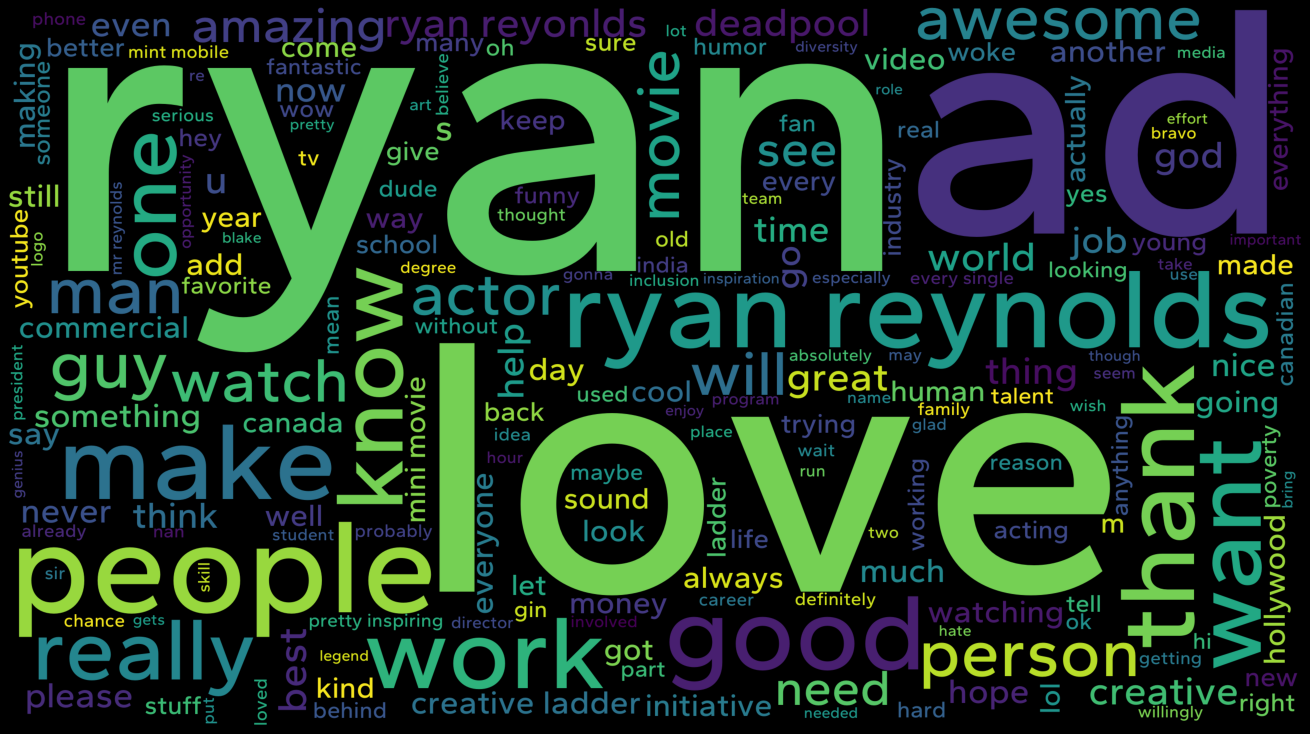

In [28]:
wordcloud = WordCloud(width = 1800, height = 1000,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 20,
                max_font_size= 600,
                scale = 1.5, 
                font_path = 'C:/SAINS DATA/Font/fonts/otf/Gantari-Medium.otf').generate(comment_words)

plt.figure(figsize = (18, 16), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()